In [1]:
# prepare data 
import pandas as pd
import numpy as np
train = pd.read_csv('spam_train.csv')
test = pd.read_csv('spam_test.csv')
## separate the predictors and response in the training data set
x_train = train.iloc[:, 0:57]
y_train = np.array(train.iloc[:, -1])
## separate the predictors and response in the test data set
x_test = test.iloc[:, 0:57]
y_test = np.array(test.iloc[:, -1])

In [2]:
train.head()

,A.1,A.2,A.3,A.4,A.5,A.6,A.7,A.8,A.9,A.10,...,A.49,A.50,A.51,A.52,A.53,A.54,A.55,A.56,A.57,spam
0,0.32,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.234,0.0,0.058,0.0,0.0,1.068,3,47,email
1,0.00,0.0,0.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.342,0.0,0.0,1.000,1,31,email
2,0.00,0.0,0.00,0.0,0.00,0.17,0.0,0.0,0.0,0.0,...,0.0,0.055,0.0,0.000,0.0,0.0,1.685,7,204,email
3,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.800,5,9,email
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.471,0.0,0.000,0.0,0.0,1.424,8,47,email


In [3]:
train.shape

(2300, 58)

In [4]:
test.shape

(2301, 58)

In [ ]:
# classfication tree: default gini
from sklearn import tree
tree_model = tree.DecisionTreeClassifier() #DecisionTreeRegressor
from sklearn import cross_validation, metrics
tree_model.fit(x_train, y_train)

In [8]:
tree_model
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
pred_train=tree_model.predict(x_train) #predict_prob
pred_test=tree_model.predict(x_test)

In [11]:
set(pred_test)

{'email', 'spam'}

In [12]:
print "training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train)
print "testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test)

training accuracy : 0.9996
testing accuracy : 0.9022


In [13]:
feature_imprtance=pd.DataFrame(train.columns[:-1],columns=['Feature'])
feature_imprtance['importance']=tree_model.feature_importances_
feature_imprtance.sort_values(by='importance', ascending=False)

,Feature,importance
52,A.53,0.323941
6,A.7,0.171245
51,A.52,0.092352
24,A.25,0.066213
56,A.57,0.045231
15,A.16,0.027739
54,A.55,0.027463
55,A.56,0.024638
20,A.21,0.020080
45,A.46,0.019670


In [14]:
# change gini to entropy
tree_model = tree.DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
pred_train=tree_model.predict(x_train)
pred_test=tree_model.predict(x_test)

In [16]:
print "training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train)
print "testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test) # gini is better

training accuracy : 0.9996
testing accuracy : 0.9009


In [17]:
feature_imprtance=pd.DataFrame(train.columns[:-1],columns=['Feature'])
feature_imprtance['importance']=tree_model.feature_importances_
feature_imprtance.sort_values(by='importance', ascending=False) # feature importance is changed

,Feature,importance
51,A.52,0.281206
54,A.55,0.128241
6,A.7,0.112446
52,A.53,0.057646
24,A.25,0.057077
15,A.16,0.049065
20,A.21,0.033808
56,A.57,0.028640
26,A.27,0.023895
55,A.56,0.023774


In [24]:
# prune the trees
# min_samples_split: The minimum number of samples required to split an internal node:
import sklearn.grid_search as gs
np.random.seed(1)
tree_model = tree.DecisionTreeClassifier()
grid_para_tree = [{"criterion": ["gini", "entropy"], "min_samples_leaf": range(1, 20)}]
grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [25]:
## best parameter
grid_search_tree.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 5}

In [26]:
## best score
grid_search_tree.best_score_

0.91

In [27]:
pred_train=grid_search_tree.predict(x_train)
pred_test=grid_search_tree.predict(x_test)

In [28]:
print "training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train)
print "testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test) # better than classfication tree

training accuracy : 0.9687
testing accuracy : 0.9083


In [29]:
#random forest: default max_feature sqrt(p)
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

In [30]:
randomForest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
np.random.seed(1)
randomForest.set_params(n_estimators=50)
randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
pred_train=randomForest.predict(x_train)
pred_test=randomForest.predict(x_test)

In [33]:
print "training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train)
print "testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test)# better than pruning tree

training accuracy : 0.9996
testing accuracy : 0.9422


In [34]:
feature_imprtance=pd.DataFrame(train.columns[:-1],columns=['Feature'])
feature_imprtance['importance']=randomForest.feature_importances_
feature_imprtance.sort_values(by='importance', ascending=False)

,Feature,importance
51,A.52,0.137031
52,A.53,0.101383
54,A.55,0.080020
6,A.7,0.077506
56,A.57,0.053551
20,A.21,0.053418
15,A.16,0.048718
55,A.56,0.046099
24,A.25,0.040302
23,A.24,0.036864


In [35]:
# bagging
np.random.seed(1)
randomForest.set_params(n_estimators=50, max_features=57)
randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=57, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
pred_train=randomForest.predict(x_train)
pred_test=randomForest.predict(x_test)

In [37]:
print "training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train)
print "testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test)# worse than random forest

training accuracy : 0.9996
testing accuracy : 0.9266


In [ ]:
np.random.seed(1)
randomForest = ensemble.RandomForestClassifier() 
import sklearn.grid_search as gs
# max_feature: feature considered for splitting
# n_estimators: number of tree
# min_samples_split: The minimum number of samples required to split an internal node:
# min_samples_leaf: The minimum number of samples required to be at a leaf node

grid_para_forest = [{"n_estimators": [10, 50, 100], "criterion": ["gini", "entropy"], \
                    "min_samples_leaf": range(1, 10), "min_samples_split": range(2, 30, 2),\
                    'max_features':range(3,10,1)}] 
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5)
grid_search_forest.fit(x_train, y_train)

In [40]:
grid_search_forest.best_params_

{'criterion': 'entropy',
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [41]:
pred_train=grid_search_forest.predict(x_train)
pred_test=grid_search_forest.predict(x_test)

In [42]:
print "training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train)
print "testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test) # best random forest

training accuracy : 0.9996
testing accuracy : 0.9452


In [43]:
# gbm
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(1)
GBM=GradientBoostingClassifier(n_estimators=50)
GBM.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [44]:
pred_train=GBM.predict(x_train)
pred_test=GBM.predict(x_test)

In [45]:
print "training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train)
print "testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test) # worse than random forest, overfitting

training accuracy : 0.9539
testing accuracy : 0.9344


In [47]:
# predict class
GBM.predict(x_train)

array(['email', 'email', 'email', ..., 'email', 'email', 'spam'], dtype=object)

In [48]:
# predict the probability of spam
GBM.predict_proba(x_train)[:,1]

array([ 0.0333752 ,  0.17857711,  0.04552774, ...,  0.0943025 ,
        0.08174416,  0.97825915])

In [50]:
# higher fixed learning rate and number of estimators for tuning tree-based parameters
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = gs.GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,random_state=10),
                        param_grid = param_test1, scoring='accuracy', cv=5)
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [51]:
gsearch1.best_params_

{'n_estimators': 50}

In [52]:
# best n_estimators: 50

In [54]:
# Take the variables with a higher impact on outcome first,  max_depth and min_samples_split have a significant impact 
# and we will tune those first.
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001, 200)}
gsearch2 =gs.GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=10), 
                        param_grid = param_test2, scoring='accuracy',cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.best_params_

{'max_depth': 13, 'min_samples_split': 400}

In [75]:
# 'n_estimators': 50, 'max_depth': 13, 'min_samples_split': 400

In [56]:
param_test3 = {'min_samples_leaf':range(10,30,2)}
gsearch3 = gs.GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,
                                                                  max_depth=13, min_samples_split=400,
                                                                  random_state=10), 
                        param_grid = param_test3, scoring='accuracy', cv=5)
gsearch3.fit(x_train, y_train)
gsearch3.best_params_

{'min_samples_leaf': 24}

In [ ]:
# 'n_estimators': 50, 'max_depth': 13, 'min_samples_split': 400, 'min_samples_leaf': 24

In [57]:
param_test4 = {'max_features':range(2,20,1)}
gsearch4 =gs.GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,
                                                               max_depth=13, min_samples_split=400,
                                                               min_samples_leaf=24,  random_state=10),
                        param_grid = param_test4, scoring='accuracy',cv=5)
gsearch4.fit(x_train, y_train)
gsearch4.best_params_

{'max_features': 16}

In [ ]:
# 'n_estimators': 50, 'max_depth': 13, 'min_samples_split': 400, 'min_samples_leaf': 24, 'max_features': 16

In [58]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = gs.GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,
                                                               max_depth=13,min_samples_split=400, 
                                                               min_samples_leaf=24,random_state=10,
                                                               max_features=16),
                        param_grid = param_test5, scoring='accuracy', cv=5)
gsearch5.fit(x_train, y_train)
gsearch5.best_params_

{'subsample': 0.85}

In [ ]:
# 'n_estimators': 50, 'max_depth': 13, 'min_samples_split': 400, 'min_samples_leaf': 24, 'max_features': 16
# 'subsample': 0.85

In [59]:
# increase trees and decrease learning rate
param_test6 = {'n_estimators':range(100,1000,100), 'learning_rate': [0.1, 0.05, 0.01]}
gsearch6 = gs.GridSearchCV(estimator = GradientBoostingClassifier(max_depth=13,min_samples_split=400, 
                                                               min_samples_leaf=24, subsample=0.85, 
                                                               random_state=10,max_features=16),
                        param_grid = param_test6, scoring='accuracy', cv=5)
gsearch6.fit(x_train, y_train)
gsearch6.best_params_

{'learning_rate': 0.05, 'n_estimators': 400}

In [60]:
# max_depth=13,min_samples_split=400, min_samples_leaf=24, subsample=0.85, 
# max_features=16, learning_rate=0.05, n_estimators=400
pred_train=gsearch6.predict(x_train)
pred_test=gsearch6.predict(x_test)

In [61]:
print "training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train)
print "testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test) # better than best random forest

training accuracy : 0.9978
testing accuracy : 0.9492


In [5]:
# xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [6]:
np.random.seed(1)
XGB=XGBClassifier(n_estimators=50)
XGB.fit(x_train, y_train)

XGBClassifier(n_estimators=50)

In [7]:
pred_train=XGB.predict(x_train)
pred_test=XGB.predict(x_test)

In [13]:
print ("training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train))
print ("testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test))# better than gbm

training accuracy : 0.9509
testing accuracy : 0.9352


In [14]:
Y_train=[1 if x=='spam' else 0 for x in y_train]

In [15]:
set(Y_train)

{0, 1}

In [20]:
from sklearn.model_selection import cross_val_score
from bayes_opt import bayesian_optimization

def xgboostcv(max_depth,
              learning_rate,
              n_estimators,
              gamma,
              min_child_weight,
              subsample,
              colsample_bytree,
              silent=True,
              objective='binary:logistic',
              nthread=-1):
    return cross_val_score(xgb.XGBClassifier(max_depth=int(max_depth),
                                             learning_rate=learning_rate,
                                             n_estimators=int(n_estimators),
                                             silent=silent,
                                             objective=objective,
                                             nthread=nthread,
                                             gamma=gamma,
                                             min_child_weight=min_child_weight,
                                             subsample=subsample,
                                             colsample_bytree=colsample_bytree),
                           x_train,
                           Y_train,
                           scoring='roc_auc',
                           cv=5).mean()

    
xgboostBO = bayesian_optimization.BayesianOptimization(xgboostcv,
                                 {'max_depth': (3, 20),
                                  'learning_rate': (0.01, 0.2),
                                  'n_estimators': (50, 500),
                                  'gamma': (0.01,1.),
                                  'min_child_weight': (1, 10),
                                  'subsample': (0.5, 1),
                                  'colsample_bytree' :(0.5, 1)})
xgboostBO.maximize(init_points=2, n_iter = 10)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.9815   |  0.7364   |  0.2347   |  0.1752   |  10.25    |  2.047    |  401.6    |  0.6532   |
|  2        |  0.9674   |  0.8648   |  0.8208   |  0.01113  |  18.02    |  9.419    |  119.5    |  0.9397   |
|  3        |  0.984    |  0.7561   |  0.6426   |  0.1618   |  11.17    |  1.329    |  401.3    |  0.8569   |
|  4        |  0.985    |  0.8818   |  1.0      |  0.07639  |  17.03    |  1.0      |  399.3    |  1.0      |
|  5        |  0.9832   |  0.9116   |  1.0      |  0.01     |  17.62    |  1.0      |  407.9    |  1.0      |
|  6        |  0.9859   |  0.5      |  1.0      |  0.2      |  12.26    |  1.0      |  391.6    |  1.0      |
|  7        |  0.9836   |  1.0      |  1.0      |  0.1101   |  20.0     |  2.269    |  386.5    |  1.0      |
|  8      

In [21]:
XGB=XGBClassifier(max_depth=12,learning_rate=0.2,n_estimators=391,silent=True,
                  objective='binary:logistic',gamma=1.0,min_child_weight=1.0,seed=1,
                  subsample=1.0,colsample_bytree=0.5)
XGB.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.5, gamma=1.0, learning_rate=0.2, max_depth=12,
              min_child_weight=1.0, n_estimators=391, seed=1, silent=True,
              subsample=1.0)

In [22]:
pred_train=XGB.predict(x_train)
pred_test=XGB.predict(x_test)

In [23]:
print ("training accuracy : %.4g" % metrics.accuracy_score(y_train, pred_train))
print ("testing accuracy : %.4g" % metrics.accuracy_score(y_test, pred_test)) # best of all the models

training accuracy : 0.9974
testing accuracy : 0.9487


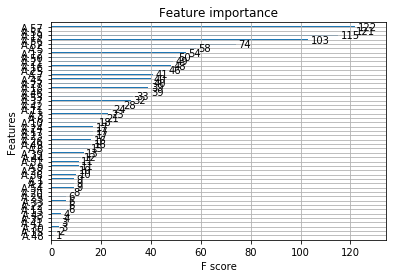

In [30]:
from xgboost import plot_importance
plot_importance(XGB)
plt.show()